# Принятие решений в бизнесе

## Контекст

<div style="background:#e5e5e5; color:#000; padding:10px">
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Надо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 
</div>

## Часть 1. Приоритизация гипотез.

<div style="background:#e5e5e5; color:#000; padding:10px">

**Дано:**
    
9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


**Найти:**

Применить фреймворки ICE, RICE и приоритизировать гипотезы.
    
</div>

**Входные данные:**

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats




In [2]:
# знакомимся с данными
data = pd.read_csv('/datasets/hypothesis.csv')
data.columns = data.columns.str.lower()

pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

display(data)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# приоритизируем гипотезы по ICE
data['ice'] = data['impact'] * data['confidence'] / data['efforts']
display(round(data[['hypothesis', 'ice']], 2).sort_values(by='ice', ascending = False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [4]:
# приоритизируем гипотезы по RICE
data['rice'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
display(data[['hypothesis', 'rice']].sort_values(by='rice', ascending = False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Выводы по оценке гипотез:**

1. Наиболее перспективные гипотезы по ICE под номерами: 8, 0, 7, 6.
1. Наиболее перспективные гипотезы по RICE под номерами: 7, 2, 0, 6.

Отличие фреймворка RICE в параметре Reach - скольких пользователей затронет изменение.

Ввиду этого, за счет малого охвата, лидирующая в ICE гипотеза №8 уже не входит в ТОП по оценке RICE.

В то же время, из-за большого охвата в ТОП поднялась гипотеза 2, хотя impact у нее небольшой.

Ядро гипотез осталось прежним: 0, 7, 6.

На основании результатов оценки гипотез предлагаю следовать фреймворку RICE: проверить 7, 2, 0, 6.

## Часть 2. Анализ A/B-теста

<div style="background:#e5e5e5; color:#000; padding:10px">
    
**Дано:**
    
2 таблицы с результатами теста: orders, visits.
    
**Проанализировать:**
1. Построить график кумулятивной выручки по группам;

1. Построить график кумулятивного среднего чека по группам;

1. Построить график относительного изменения кумулятивного среднего чека группы B к группе A;

1. Построить график кумулятивного среднего количества заказов на посетителя по группам;

1. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;

1. Построить точечный график количества заказов по пользователям;

1. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей;

1. Построить точечный график стоимостей заказов;

1. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов;

1. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;

1. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;

1. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;

1. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;

1. Принять решение по результатам теста. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.
</div>

**Входные данные:**

**Таблица orders:**

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

**Таблица visitors**

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [5]:
# изучаем таблицу orders
# меняем тип даты
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# изучаем таблицу visitors
# меняем тип даты
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# проверяем на дубли
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [8]:
# проверка на попадание одного заказа в обе группы
orders_A = orders[orders['group'] == 'A']['transactionId'].unique()
print(orders[orders['group'] == 'B']['transactionId'].isin(orders_A).sum())

0


In [9]:
# проверка на попадание одного юзера в обе группы
orders_A = orders[orders['group'] == 'A']['visitorId'].unique()
print(orders[orders['group'] == 'B']['visitorId'].isin(orders_A).sum())

92


In [10]:
# считаем дневное количество посетителей в группе А, а также кумулятивное количество посетителей группы
vistiorsAdaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
vistiorsAdaily.columns = ['date', 'visitorsPerDateA']
display(vistiorsAdaily.head())

visitorsACummulative = (
    vistiorsAdaily.apply(lambda x: vistiorsAdaily[vistiorsAdaily['date'] <= x['date']]
                  .agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis = 1)
)
visitorsACummulative.columns = ['date','visitorsCummulativeA']

display(visitorsACummulative.head())

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [11]:
# считаем дневное количество посетителей в группе B, а также кумулятивное количество посетителей группы
vistiorsBdaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
vistiorsBdaily.columns = ['date', 'visitorsPerDateB']
display(vistiorsBdaily.head())

visitorsBCummulative = (
    vistiorsBdaily.apply(lambda x: vistiorsBdaily[vistiorsBdaily['date'] <= x['date']]
                  .agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis = 1)
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
display(visitorsBCummulative.head())

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [12]:
# считаем дневное количество заказов и дневную выручку в группе А, а также кумулятивные значения заказов и выручки
ordersAdaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']] 
.groupby('date', as_index = False)
.agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersAdaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
display(ordersAdaily.head())

ordersACummulative = (
    ordersAdaily.apply(lambda x: ordersAdaily[ordersAdaily['date'] <= x['date']]
                      .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis = 1)

)
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [13]:
# считаем дневное количество заказов и дневную выручку в группе B, а также кумулятивные значения заказов и выручки
ordersBdaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
.groupby('date', as_index = False)
.agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersBdaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
display(ordersBdaily.head())
      
ordersBCummulative = (ordersBdaily.apply(lambda x: ordersBdaily[ordersBdaily['date'] <= x['date']]
.agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis = 1
))
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [14]:
# объединяем таблицы
data = (vistiorsAdaily.merge(vistiorsBdaily, left_on = 'date', right_on = 'date', how = 'left')
        .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')
        .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
        .merge(ordersAdaily, left_on = 'date', right_on = 'date', how = 'left')
        .merge(ordersBdaily, left_on = 'date', right_on = 'date', how = 'left')
        .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')
        .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')
       )
display(data.head(10))

,date,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,719,713,719,713,24,148579,21,101217,24,148579,21,101217
1,2019-08-02,619,581,1338,1294,20,93822,24,165531,44,242401,45,266748
2,2019-08-03,507,509,1845,1803,24,112473,16,114248,68,354874,61,380996
3,2019-08-04,717,770,2562,2573,16,70825,17,108571,84,425699,78,489567
4,2019-08-05,756,707,3318,3280,25,124218,23,92428,109,549917,101,581995
5,2019-08-06,667,655,3985,3935,18,48484,28,242342,127,598401,129,824337
6,2019-08-07,644,709,4629,4644,18,142417,24,225334,145,740818,153,1049671
7,2019-08-08,610,654,5239,5298,16,96279,27,220918,161,837097,180,1270589
8,2019-08-09,617,610,5856,5908,16,188506,25,160812,177,1025603,205,1431401
9,2019-08-10,406,369,6262,6277,16,210495,23,107802,193,1236098,228,1539203


In [15]:
#print (f"Минимальная дата заказа: {orders['date'].min()}")
#print (f"Максимальная дата заказа: {orders['date'].max()}")
#print (f"Минимальная дата посещения: {visitors['date'].min()}")
#print (f"Максимальная дата посещения: {visitors['date'].max()}")
#print (f"Минимальная дата сводной: {data['date'].min()}")
#print (f"Максимальная дата сводной: {data['date'].max()}")

if {orders['date'].min()} == {visitors['date'].min()} == {data['date'].min()} and {orders['date'].max()} == {visitors['date'].max()} == {data['date'].max()}:
    print ('даты ок')
else:
    print('даты не ок')

даты ок


### График кумулятивной выручки по группам

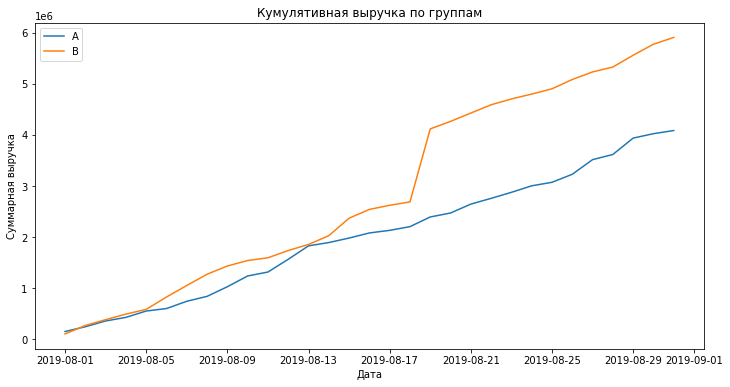

In [16]:
# график кумулятивной выручки по группам
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(data['date'], data['revenueCummulativeA'], label = 'A')
plt.plot(data['date'], data['revenueCummulativeB'], label = 'B')
plt.xlabel("Дата")
plt.ylabel("Суммарная выручка")
plt.title("Кумулятивная выручка по группам")

plt.legend() 
plt.show()


**Вывод:**
Выручка планомерно увеличивается на протяжении всего теста.

Однако, графики в нескольких точках резко растут.

Это может сигнализировать о всплеске количества заказов или о появлении аномально дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

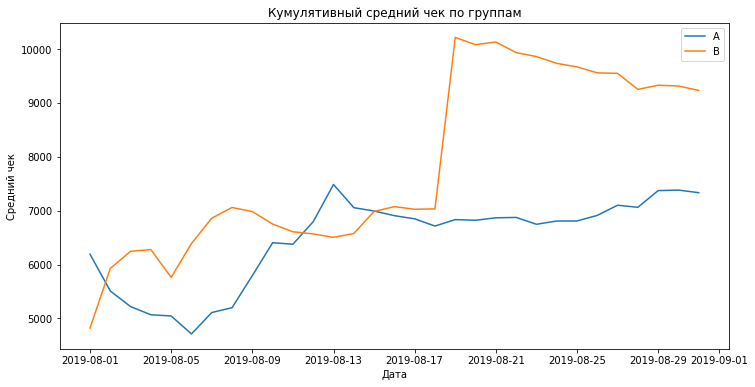

In [17]:
# график кумулятивного среднего чека по группам
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(data['date'], data['revenueCummulativeA'] / data['ordersCummulativeA'], label = 'A')
plt.plot(data['date'], data['revenueCummulativeB'] / data['ordersCummulativeB'], label = 'B')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.title("Кумулятивный средний чек по группам")
plt.legend() 
plt.show()


**Вывод:**

В группе B наблюдаются всплески, ввиду попадания крупных заказов. 

Показатели группы B все еще не пришли к реальному среднему чеку.

### График относительного изменения кумулятивного среднего чека группы B к группе A

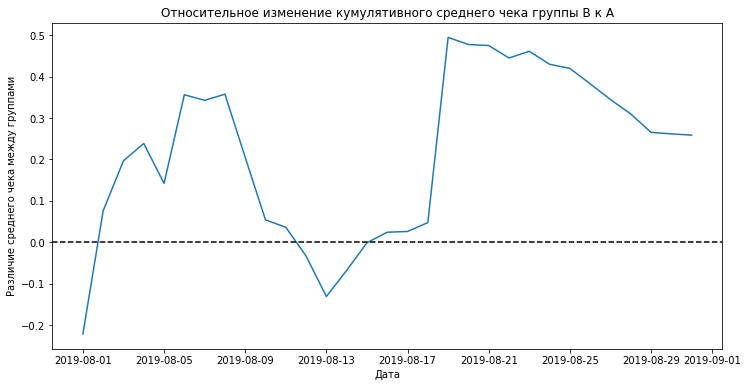

In [18]:
# график относительного изменения кумулятивного среднего чека группы B к группе A
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(data['date'], (data['revenueCummulativeB'] / data['ordersCummulativeB']) / (data['revenueCummulativeA'] / data['ordersCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel("Дата")
plt.ylabel("Различие среднего чека между группами")
plt.title("Относительное изменение кумулятивного среднего чека группы B к A")
plt.show()

**Вывод:**

Группа B не стабильна по показателям среднеднего чека, в какой-то момент времени средний чек стал меньше, чем в группе А.

Ввиду всплеска средний чек группы B снова вырос, но  затем вновь наблюдается его снижение.

### График кумулятивного среднего количества заказов на посетителя по группам

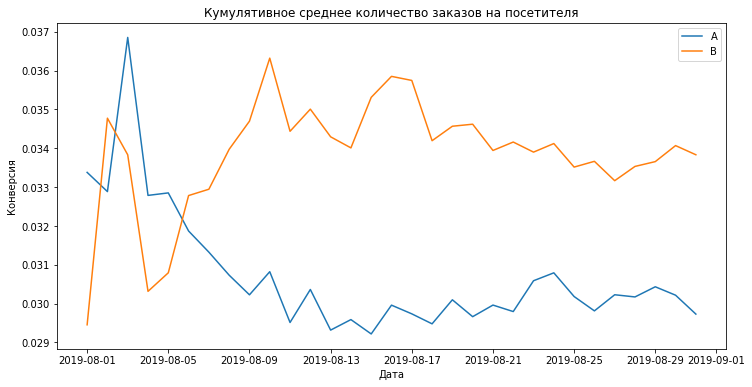

In [19]:
# график кумулятивного среднего количества заказов на посетителя по группам
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(data['date'], (data['ordersCummulativeA'] / data['visitorsCummulativeA']), label = 'A')
plt.plot(data['date'], (data['ordersCummulativeB'] / data['visitorsCummulativeB']), label = 'B')
plt.legend() 
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.title("Кумулятивное среднее количество заказов на посетителя")
plt.show()

**Вывод:**

Среднее количество заказов у группы B стабильно больше. 

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

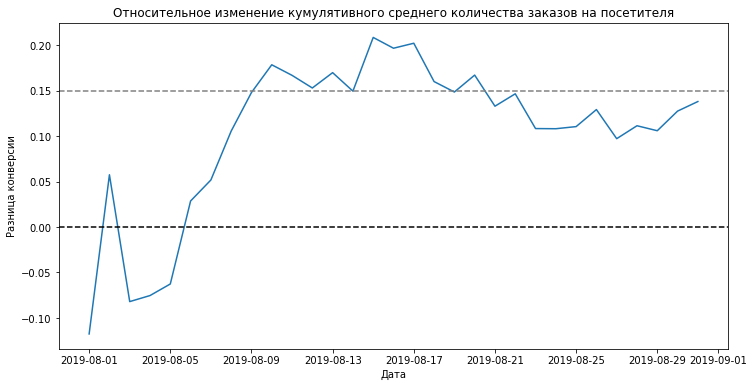

In [20]:
# график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(data['date'], (data['ordersCummulativeB'] / data['visitorsCummulativeB']) / (data['ordersCummulativeA'] / data['visitorsCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xlabel("Дата")
plt.ylabel("Разница конверсии")
plt.title("Относительное изменение кумулятивного среднего количества заказов на посетителя")
plt.show()


**Вывод:**

На графике видно, что относительное кумулятивное среднее значительно лучше у группы B.

In [21]:
# считаем количество заказов по пользователям
ordersByUsers = (orders.groupby('visitorId', as_index = False)
                .agg({'transactionId': 'nunique'})
                .sort_values(by='transactionId', ascending = False)
                )
ordersByUsers.columns = ['visitorId', 'orders']
display(ordersByUsers.head())

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


### Точечный график количества заказов по пользователям

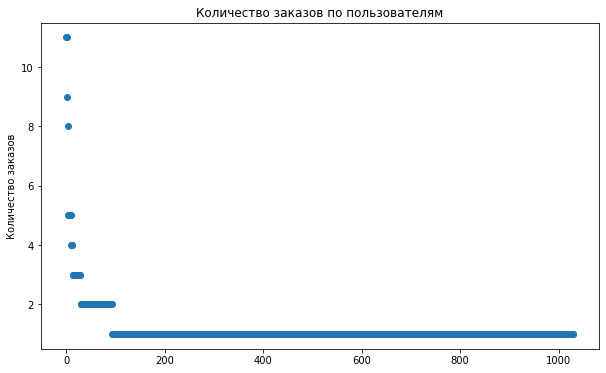

In [22]:
# точечный график количества заказов по пользователям
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.ylabel("Количество заказов")
plt.title("Количество заказов по пользователям")
plt.show()

**Вывод:**

Большинство юзеров совершили не более 2-х покупок, в то же время есть отдельные пользователи, совершившие более 10 заказов.

### 95-й и 99-й перцентили количества заказов на пользователя

In [23]:
# 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод:**

Не более 5% пользователей оформляли 2+ заказов, и только лишь 1% пользователей сделали не менее 4-х заказов.

Примем за аномальных пользователей тех, кто совершил более 2-х покупок.

### Точечный график стоимостей заказов

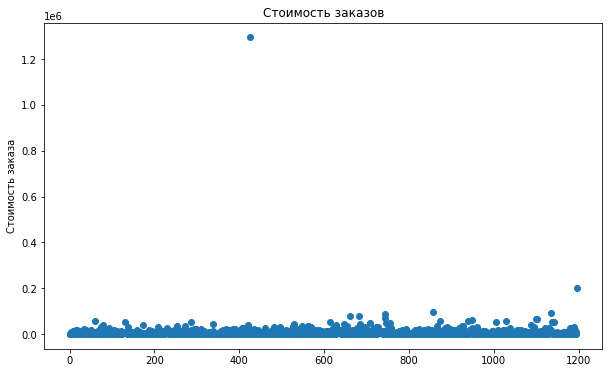

In [24]:
# точечный график стоимостей заказов
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.ylabel("Стоимость заказа")
plt.title("Стоимость заказов")
plt.show()

**Вывод:**

Есть выбросы по стоимости заказов, однако бОльшая часть заказов находится в ценовом диапазоне до 50К.

### 95-й и 99-й перцентили стоимости заказов

In [25]:
# 95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


**Вывод:**

5% пользователей заплатили более 28000 руб. за заказ, не более 1% посетителей потратили более 58233 руб.

Примем за аномальных пользователей тех, кто потратил более 28К.

In [26]:
# количество заказов на одного юзера по группам
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index = False)
                .agg({'transactionId': 'nunique'})
                )
ordersByUsersA.columns = ['visitorId', 'orders']
display(ordersByUsersA.sort_values(by='orders', ascending = False).head())

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index = False)
                .agg({'transactionId': 'nunique'})
                )
ordersByUsersB.columns = ['visitorId', 'orders']

,visitorId,orders
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4


### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различия в среднем количестве заказов между группами по "сырым" данным.

* Нулевая гипотеза: статистически значимых различий в среднем числе заказов между группами нет.
* Альтернативная гипотеза: статистически значимые различия в среднем числе заказов между группами есть.

Уровень статистической значимости alpha = 0.05.

Ввиду того, что в данных могут быть большие (по сравнению с нормальным распределением) выбросы, используем для проверки U-критерий Манна-Уитни.

In [27]:
# статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)[1]

print('p-значение: ', results)
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print('Относительная разница групп:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима
Относительная разница групп: 0.138


**Вывод:**

По «сырым» данным наблюдаются различия в среднем числе заказов групп A и B.
    
Первое число — p-value = 0.017 меньше 0.05. 

Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

Относительный выигрыш группы B равен 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различия в среднем чеке заказа между группами по "сырым" данным.

* Нулевая гипотеза: статистически значимых различий в среднем чеке между группами нет.
* Альтернативная гипотеза: статистически значимые различия в среднем чеке между группами есть.

Уровень статистической значимости alpha = 0.05.

Ввиду того, что в данных могут быть большие (по сравнению с нормальным распределением) выбросы, используем для проверки U-критерий Манна-Уитни.

In [28]:
# статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

alpha = 0.05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-значение: ', results)
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print('Относительная разница групп:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))



p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительная разница групп: 0.259


**Вывод:**

P-value значительно больше 0.05. 

Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Относительная разница групп может быть вызвана аномально большими заказами, проверим это при тесте "очищенных" данных.


In [29]:
# удаляем аномально активных клиентов и аномально дорогие заказы
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
74


In [30]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
    axis=0,
)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],
    axis=0,
)

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Посчитаем статистическую значимость различия в среднем количестве заказов между группами по "очищенным" данным.

* Нулевая гипотеза: статистически значимых различий в среднем числе заказов между группами нет.
* Альтернативная гипотеза: статистически значимые различия в среднем числе заказов между группами есть.

Уровень статистической значимости alpha = 0.05.

Ввиду того, что в данных могут быть большие (по сравнению с нормальным распределением) выбросы, используем для проверки U-критерий Манна-Уитни.

In [31]:
# статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-значение: ', results)
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

print('Относительная разница групп:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.013042592743036745
Отвергаем нулевую гипотезу: разница статистически значима
Относительная разница групп: 0.173


**Вывод:**

По «очищенным» данным наблюдаются различия в среднем числе заказов групп A и B.
    
p-value = 0.013 меньше 0.05. 

Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

Относительный выигрыш группы B равен 17.3%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различия в среднем чеке заказа между группами по "очищенным" данным.

* Нулевая гипотеза: статистически значимых различий в среднем чеке между группами нет.
* Альтернативная гипотеза: статистически значимые различия в среднем чеке между группами есть.

Уровень статистической значимости alpha = 0.05.

Ввиду того, что в данных могут быть большие (по сравнению с нормальным распределением) выбросы, используем для проверки U-критерий Манна-Уитни.

In [32]:
# статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
alpha = 0.05
results = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[
np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))
]['revenue'])[1]

print('p-значение: ', results)
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


print('Относительная разница групп:', "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() 
                       / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)
) 

p-значение:  0.738481751314565
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительная разница групп: -0.020


**Вывод:**

P-value значительно больше 0.05. 

Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Относительная разница групп после очистки данных сократилась до 2% в пользу группы А.

### Графики кумулятивной выручки и кумулятивного среднего чека по группам после "очистки"

<div style="background:#e5e5e5; color:#000; padding:10px">
Предлагаю посмотреть на график кумулятивной выручки и кумулятивного среднего чека по группам после "очистки".
</div>

In [33]:
# очищаем orders от аномальных заказов
data_filtered = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]
print(data_filtered)

      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     1650     B
1        2804400009  3642806036 2019-08-15      730     B
2        2961555356  4069496402 2019-08-15      400     A
3        3797467345  1196621759 2019-08-15     9759     B
4        2282983706  2322279887 2019-08-15     2308     B
...             ...         ...        ...      ...   ...
1190       38478481  1197745035 2019-08-14     8600     B
1191     3592955527   608641596 2019-08-14    16490     B
1192     2662137336  3733762160 2019-08-14     6490     B
1193     2203539145   370388673 2019-08-14     3190     A
1194     1807773912   573423106 2019-08-14    10550     A

[1033 rows x 5 columns]


In [34]:
# считаем новые ordersPerDate и revenuePerDate для группы А
ordersAdaily_filtered = (data_filtered[data_filtered['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']] 
.groupby('date', as_index = False)
.agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersAdaily_filtered.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
display(ordersAdaily_filtered.head())

ordersACummulative_filtered = (
    ordersAdaily_filtered.apply(lambda x: ordersAdaily_filtered[ordersAdaily_filtered['date'] <= x['date']]
                      .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis = 1)

)
ordersACummulative_filtered.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative_filtered.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,16,54351
1,2019-08-02,19,92132
2,2019-08-03,24,112473
3,2019-08-04,13,66415
4,2019-08-05,25,124218


,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,16,54351
1,2019-08-02,35,146483
2,2019-08-03,59,258956
3,2019-08-04,72,325371
4,2019-08-05,97,449589


In [35]:
# считаем новые ordersPerDate и revenuePerDate для группы B
ordersBdaily_filtered = (data_filtered[data_filtered['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']] 
.groupby('date', as_index = False)
.agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersBdaily_filtered.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
display(ordersBdaily_filtered.head())

ordersBCummulative_filtered = (
    ordersBdaily_filtered.apply(lambda x: ordersBdaily_filtered[ordersBdaily_filtered['date'] <= x['date']]
                      .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis = 1)

)
ordersBCummulative_filtered.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative_filtered.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,19,78258
1,2019-08-02,21,93234
2,2019-08-03,16,114248
3,2019-08-04,15,74421
4,2019-08-05,21,61658


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,19,78258
1,2019-08-02,40,171492
2,2019-08-03,56,285740
3,2019-08-04,71,360161
4,2019-08-05,92,421819


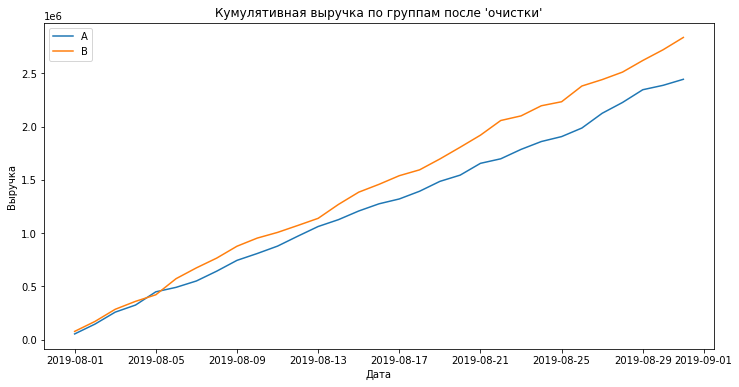

In [36]:
# график кумулятивной выручки по группам после "очистки"
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(data['date'], ordersACummulative_filtered['revenueCummulativeA'], label = 'A')
plt.plot(data['date'], ordersBCummulative_filtered['revenueCummulativeB'], label = 'B')

plt.legend() 
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.title("Кумулятивная выручка по группам после 'очистки'")
plt.show()

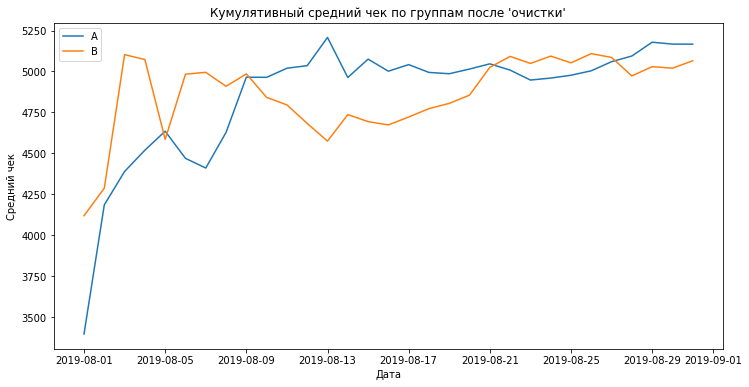

In [37]:
# график кумулятивного среднего чека по группам после 'очистки'
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(data['date'], ordersACummulative_filtered['revenueCummulativeA'] / ordersACummulative_filtered['ordersCummulativeA'], label = 'A')
plt.plot(data['date'], ordersBCummulative_filtered['revenueCummulativeB'] / ordersBCummulative_filtered['ordersCummulativeB'], label = 'B')
plt.legend() 
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.title("Кумулятивный средний чек по группам после 'очистки'")
plt.show()

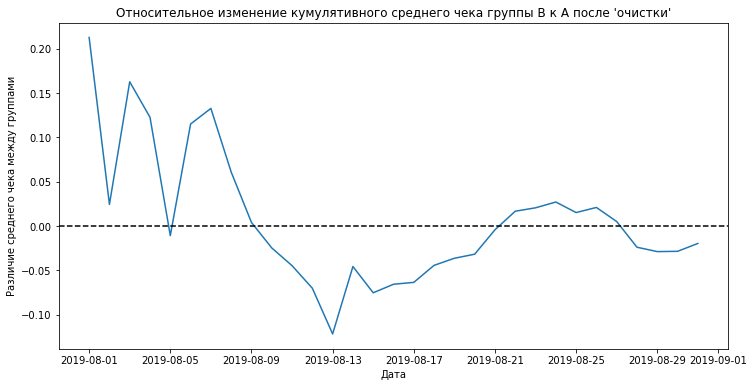

In [38]:
# график относительного изменения кумулятивного среднего чека по группам после "очистки" 
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(data['date'], (ordersBCummulative_filtered['revenueCummulativeB'] / ordersBCummulative_filtered['ordersCummulativeB']) / (ordersACummulative_filtered['revenueCummulativeA'] / ordersACummulative_filtered['ordersCummulativeA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel("Дата")
plt.ylabel("Различие среднего чека между группами")
plt.title("Относительное изменение кумулятивного среднего чека группы B к A после 'очистки'")
plt.show()

### Общие выводы по работе:


1. Кумулятивная выручка группы B больше как по "сырым" данным, так и после фильтрации.


2. Есть статистически значимое различие в среднем количестве заказов на пользователя между группами как по сырым данным, так и после фильтрации аномалий. Относительный выигрыш группы B равен 17.3%.


3. График различия конверсий между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.


4. Нет статистически значимого различия по среднему чеку между группами. График различия среднего чека колеблется как по "сырым" данным, так и после "очистки", сделать из этого графика определённые выводы нельзя.


5. Тест следует остановить , признать его успешным на основании возросшей конверсии и выручки.